<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Car%20prices%20analysis/Images/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualization

Hasta el momento hemos visto la utilidad de los diferentes tipos de gráficas a la hora de analizar relaciones entre conjuntos de datos, así que ahora dejando de lado los modelos estadísticos se tratará de realizar un análisis visual entre los datos proporcionados por el dataframe estudiado.

Una de las herramientas útiles es observar el tipo de distribución que sigue cada variable, para esto se realiza un histograma para cada una:

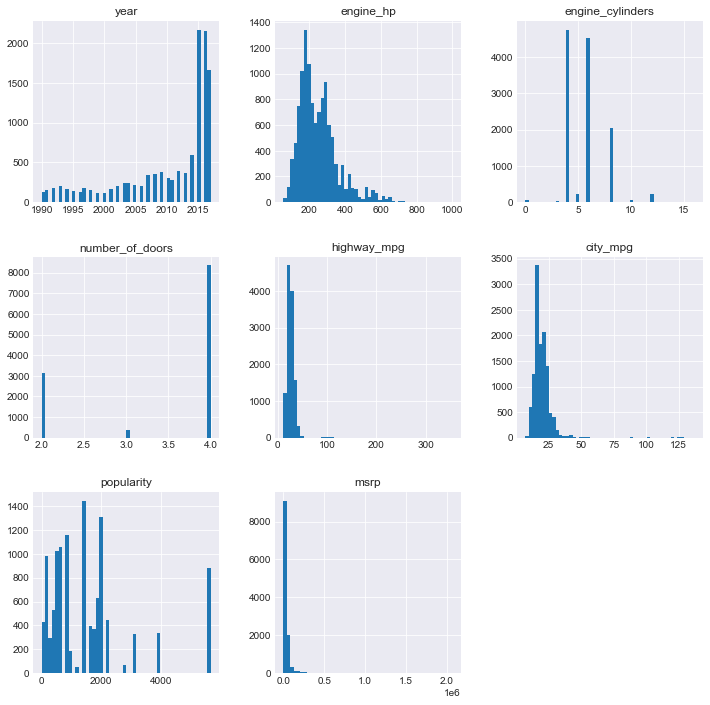

In [ ]:
df_clean.hist(bins = 50, figsize = (12,12));

Notando que las distribuciones de las variables tipo *float* o *int* no son de tipo habituales como lo es la distribución normal, muy común en diferentes fenómenos.

Debido a las variadas distribuciones que pueden encontrarse en las variables, es posible realizar diagramas de caja para cada una y así identificar posibles valores atípicos en cada una:

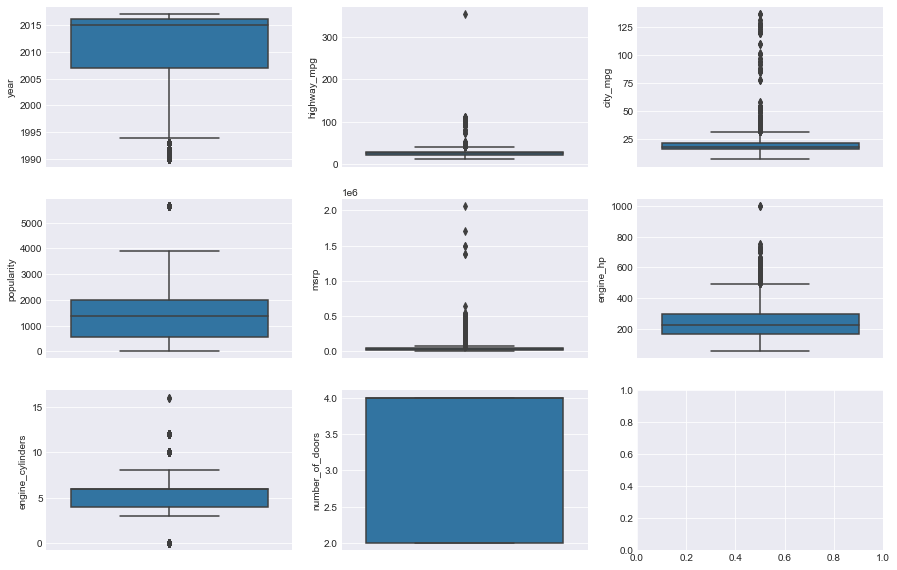

In [ ]:
num = list(df_clean.dtypes[df_clean.dtypes == 'int64'].index) + \
      list(df_clean.dtypes[df_clean.dtypes == 'float64'].index)

fig4, ax = plt.subplots(3, 3, figsize=(15,10))

cont1, cont2 = 0, 0
for col in num:
    sns.boxplot(ax = ax[cont2][cont1], data = df_clean, y = col);
    cont1 += 1
    if cont1 == 3:
        cont2 += 1
        cont1 = 0
    
fig3.suptitle('Diagrama de caja para todas las variables numéricas', fontsize=20);

Los diagramas anteriores dejan ver que las variables como de punto flotante (float64) presentan más candidatos a *outliers* que las de tipo entero. De ahora en adelante se trabajará con un dataframe sin dichos valores atípicos aplicando la función ya definida *outliers(data, col)*:

In [ ]:
new_df = df_clean.copy()

for col in num:
    outliers(new_df, col)
    
new_df.info()          # Reducción de 11914 a 11203 filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11203 entries, 0 to 11202
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11203 non-null  object 
 1   model              11203 non-null  object 
 2   year               11203 non-null  int64  
 3   engine_fuel_type   11203 non-null  object 
 4   engine_hp          11203 non-null  float64
 5   engine_cylinders   11203 non-null  float64
 6   transmission_type  11203 non-null  object 
 7   driven_wheels      11203 non-null  object 
 8   number_of_doors    11203 non-null  float64
 9   vehicle_size       11203 non-null  object 
 10  vehicle_style      11203 non-null  object 
 11  highway_mpg        11203 non-null  int64  
 12  city_mpg           11203 non-null  int64  
 13  popularity         11203 non-null  int64  
 14  msrp               11203 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.3+ MB


### 5.1. Visualizaciones encaminadas a determinar precios según características del vehículo

Ahora, resulta interesante seguir encontrando relaciones entre el resto de variables con el precio de los vehículos, por ejemplo es posible encontrar los rangos de precios según la empresa fabricante:

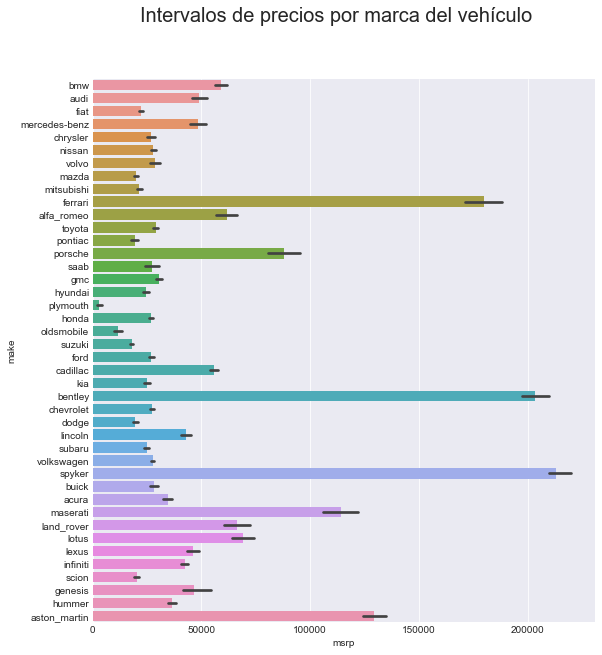

In [ ]:
plt.figure(figsize = (9,10))
sns.barplot(data = new_df, y = "make", x = "msrp");
plt.suptitle('Intervalos de precios por marca del vehículo', fontsize = 20);

Lo anterior deja ver que marcas como **plymouth** y **oldsmobile** tienen los precios más bajos de las marcas incluidas en este dataframe, caso contrario de **spyker** y **bentley** que presentan en promedio los precios más altos.

Así mismo, un procedimiento similar puede realizarse para los modelos de una marca específica, por ejemplo *Volkswagen*:

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge', 'nissan', 'gmc', 'mazda', 'honda', 'cadillac']


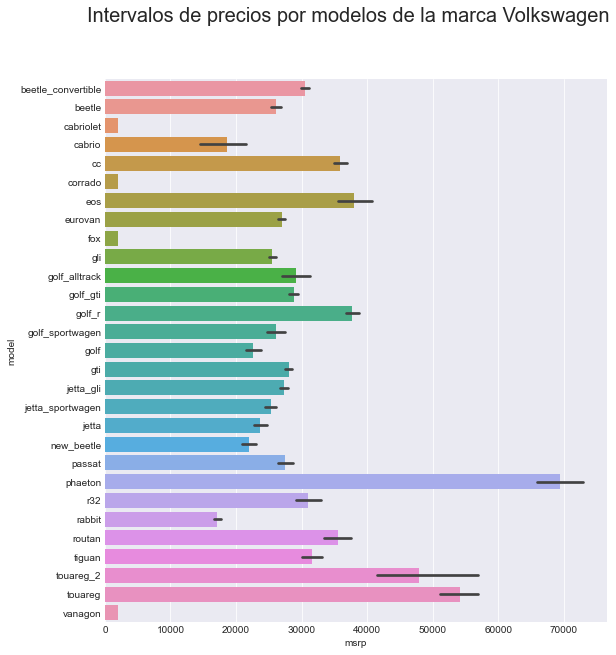

In [ ]:
# Imprimimos las marcas con mayor número de 
# vehículos en el dataframe
print(list(new_df['make'].value_counts().index)[:10])

# Se selecciona una de las 10 primeras
chev = new_df.groupby('make').get_group('volkswagen')

plt.figure(figsize = (9,10))
sns.barplot(data = chev, y = "model", x = "msrp");
plt.suptitle('Intervalos de precios por modelos de la marca Volkswagen', fontsize = 20);

La gráfica permite ver que los precios de los vehículos *Volkswagen* oscilan entre los 2000 y 70000 dolares aproximadamente. Análisis similares respecto a posibles tendencias entre variables y precios de los vehículos pueden realizarse, como se muestra  a continuación:

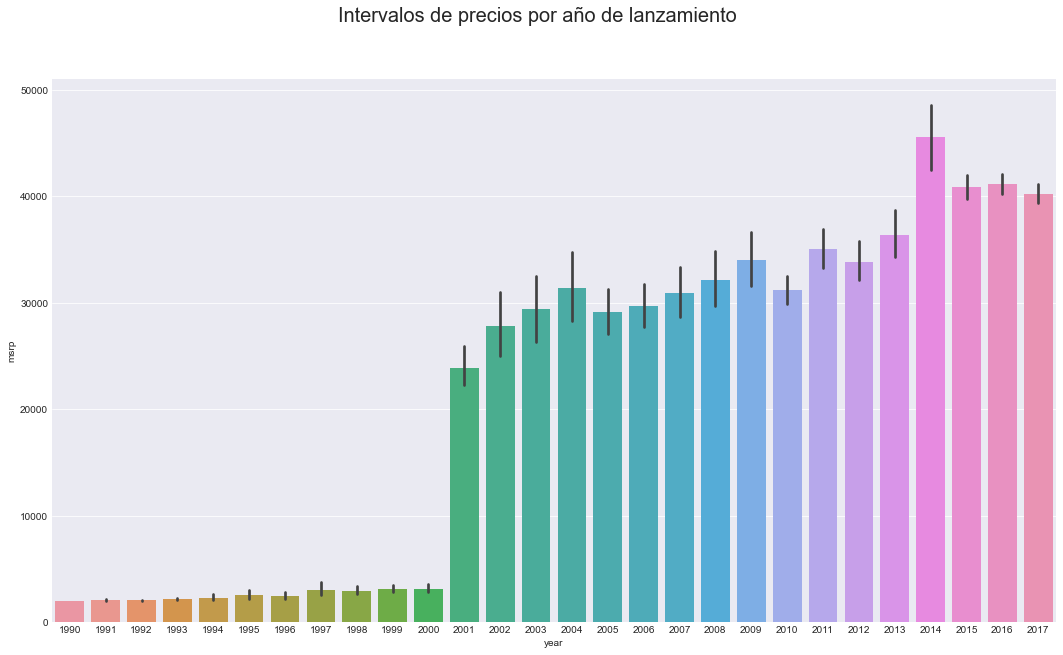

In [ ]:
plt.figure(figsize = (18,10))
sns.barplot(data = new_df, x = "year", y = "msrp");
plt.suptitle('Intervalos de precios por año de lanzamiento', fontsize = 20);

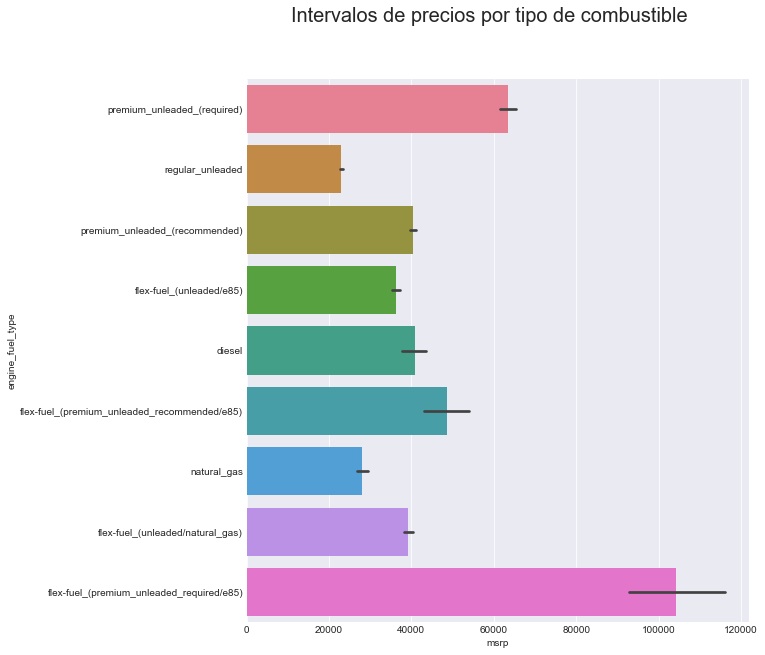

In [ ]:
plt.figure(figsize = (9,10))
sns.barplot(data = new_df, y = "engine_fuel_type", x = "msrp", palette = 'husl');
plt.suptitle('Intervalos de precios por tipo de combustible', fontsize = 20);

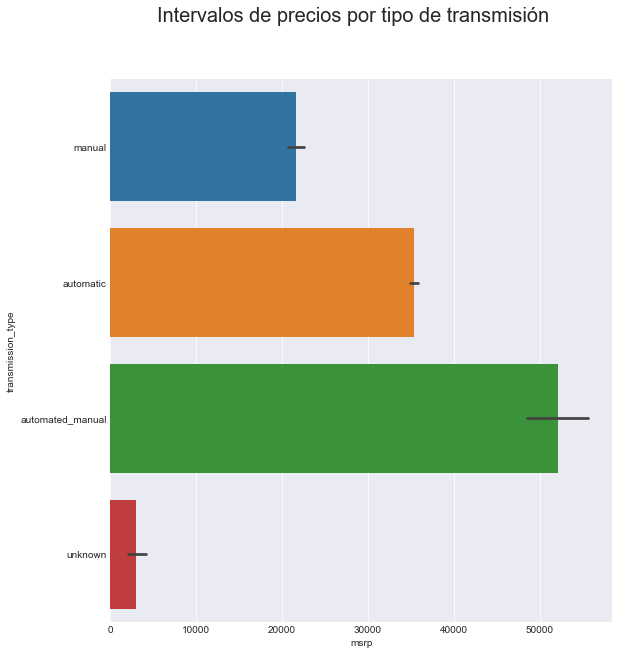

In [ ]:
plt.figure(figsize = (9,10))
sns.barplot(data = new_df, y = "transmission_type", x = "msrp");
plt.suptitle('Intervalos de precios por tipo de transmisión', fontsize = 20);

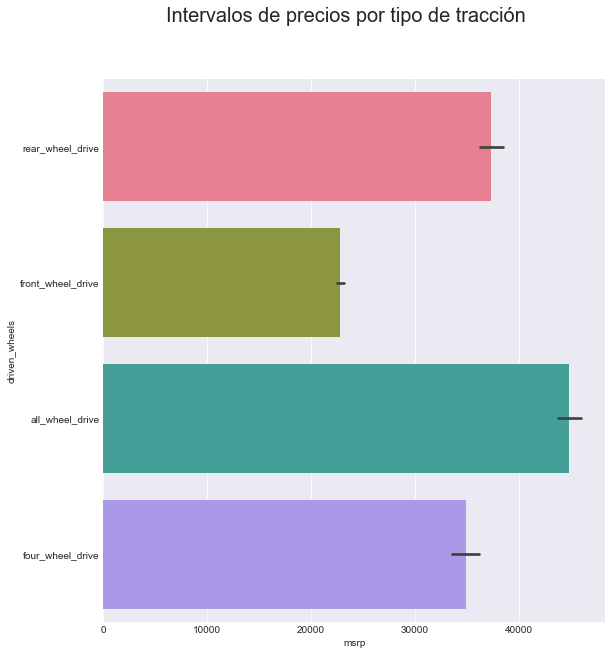

In [ ]:
plt.figure(figsize = (9,10))
sns.barplot(data = new_df, y = "driven_wheels", x = "msrp", palette = 'husl');
plt.suptitle('Intervalos de precios por tipo de tracción', fontsize = 20);

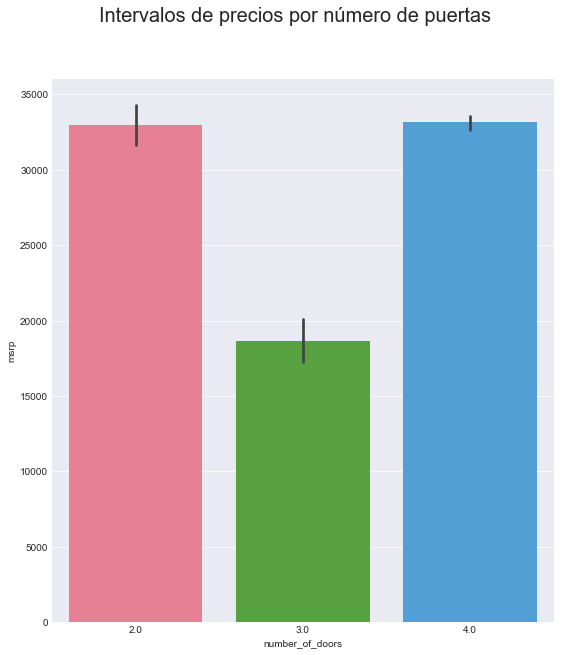

In [ ]:
plt.figure(figsize = (9,10))
sns.barplot(data = new_df, x = "number_of_doors", y = "msrp", palette = 'husl');
plt.suptitle('Intervalos de precios por número de puertas', fontsize = 20);

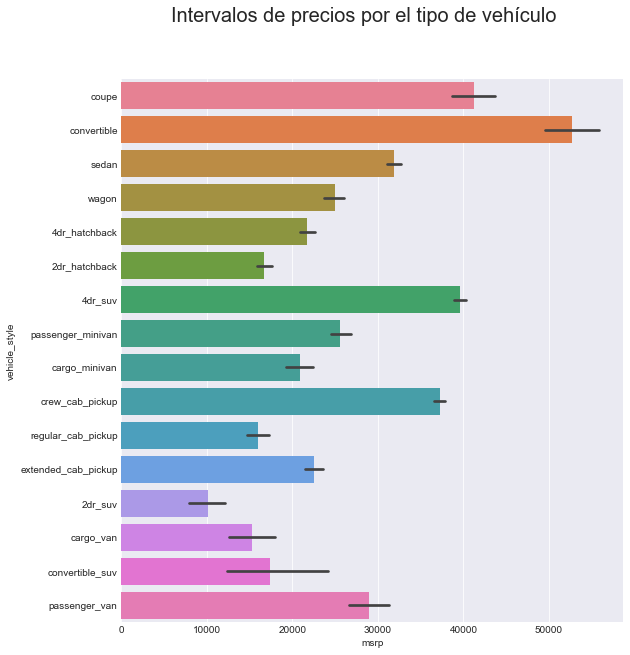

In [ ]:
plt.figure(figsize = (9,10))
sns.barplot(data = new_df, y = "vehicle_style", x = "msrp", palette = 'husl');
plt.suptitle('Intervalos de precios por el tipo de vehículo', fontsize = 20);

De todas las gráficas de barras analizadas es posible hacer múltiples afirmaciones, entre ellas el evidente aumento de los precios de los vehículos con el paso de los años. Otra manera efectiva de expresar estas relaciones es a partir de diagramas de caja como se presentan en las siguientes figuras:

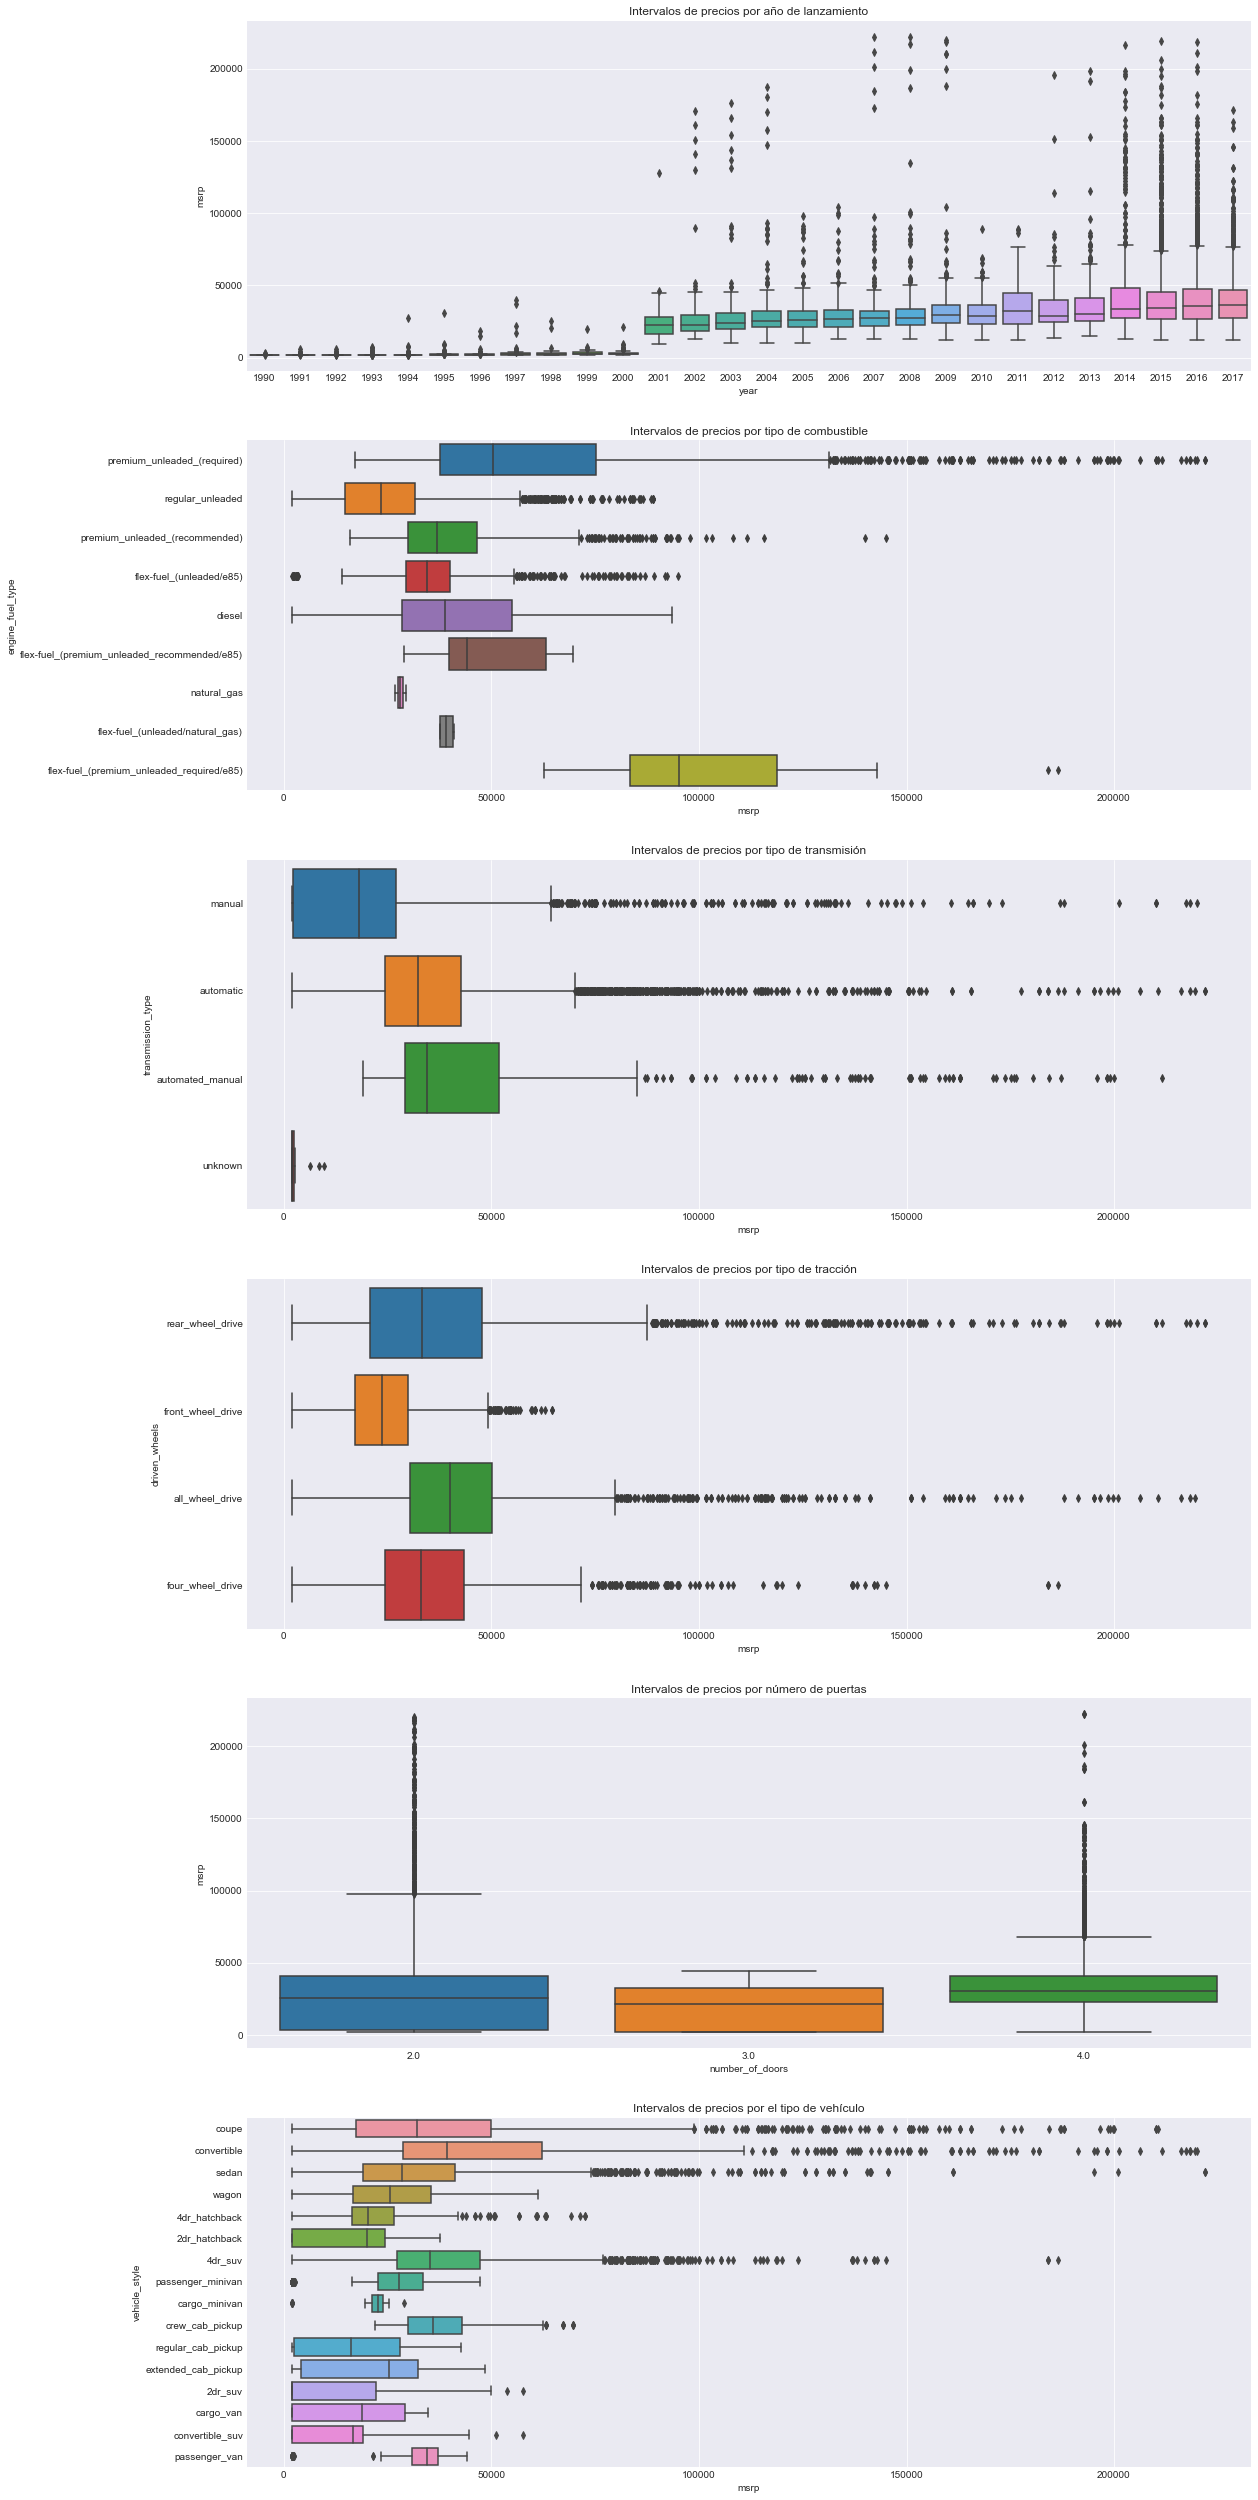

In [ ]:
fig5, ax = plt.subplots(6, 1, figsize=(18,45))
sns.boxplot(ax = ax[0], x = "year", y = "msrp", data = new_df);
sns.boxplot(ax = ax[1], y = "engine_fuel_type", x = "msrp", data = new_df);
sns.boxplot(ax = ax[2], y = "transmission_type", x = "msrp", data = new_df);
sns.boxplot(ax = ax[3], y = "driven_wheels", x = "msrp", data = new_df);
sns.boxplot(ax = ax[4], x = "number_of_doors", y = "msrp", data = new_df);
sns.boxplot(ax = ax[5], y = "vehicle_style", x = "msrp", data = new_df);
ax[0].set_title('Intervalos de precios por año de lanzamiento');
ax[1].set_title('Intervalos de precios por tipo de combustible');
ax[2].set_title('Intervalos de precios por tipo de transmisión');
ax[3].set_title('Intervalos de precios por tipo de tracción');
ax[4].set_title('Intervalos de precios por número de puertas');
ax[5].set_title('Intervalos de precios por el tipo de vehículo');

La información de las gráficas presentadas en la celda anterior añaden además del intervalo de precios según cada característica, los posibles datos atípicos refiriéndose a vehículos muy costosos o muy baratos.

### 5.2. Visualizaciones para encontrar relaciones entre diferentes variables

Dejando de lado las posibles relaciones entre el precio del vehículo con el resto de variable, también existen relaciones entre el resto de variables que merecen la pena ser estudiadas. Aquí algunas de ellas:

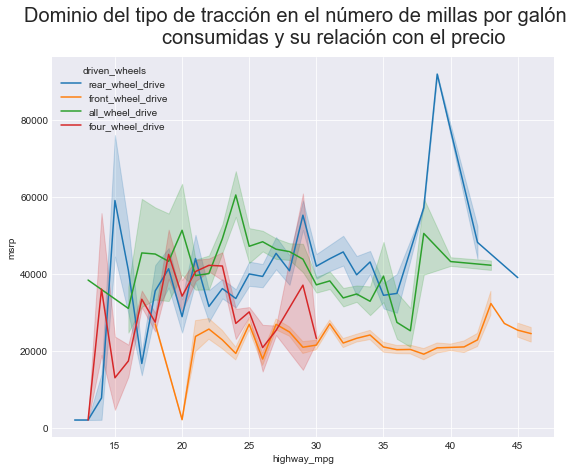

In [ ]:
plt.figure(figsize=(9,7))
sns.lineplot(data = new_df, x = "highway_mpg", y = "msrp", hue = "driven_wheels");
plt.suptitle('''Dominio del tipo de tracción en el número de millas por galón
              consumidas y su relación con el precio''', fontsize = 20);

La anterior gráfica muestra que los vehículos de tracción trasera son los más costosos a lo largo de todos los valores que toma la variable *highway_mpg*, mientras que los de tracción delantera son los más económicos. A continuación un nuevo ejemplo para estudiar la popularidad de los vehículos:

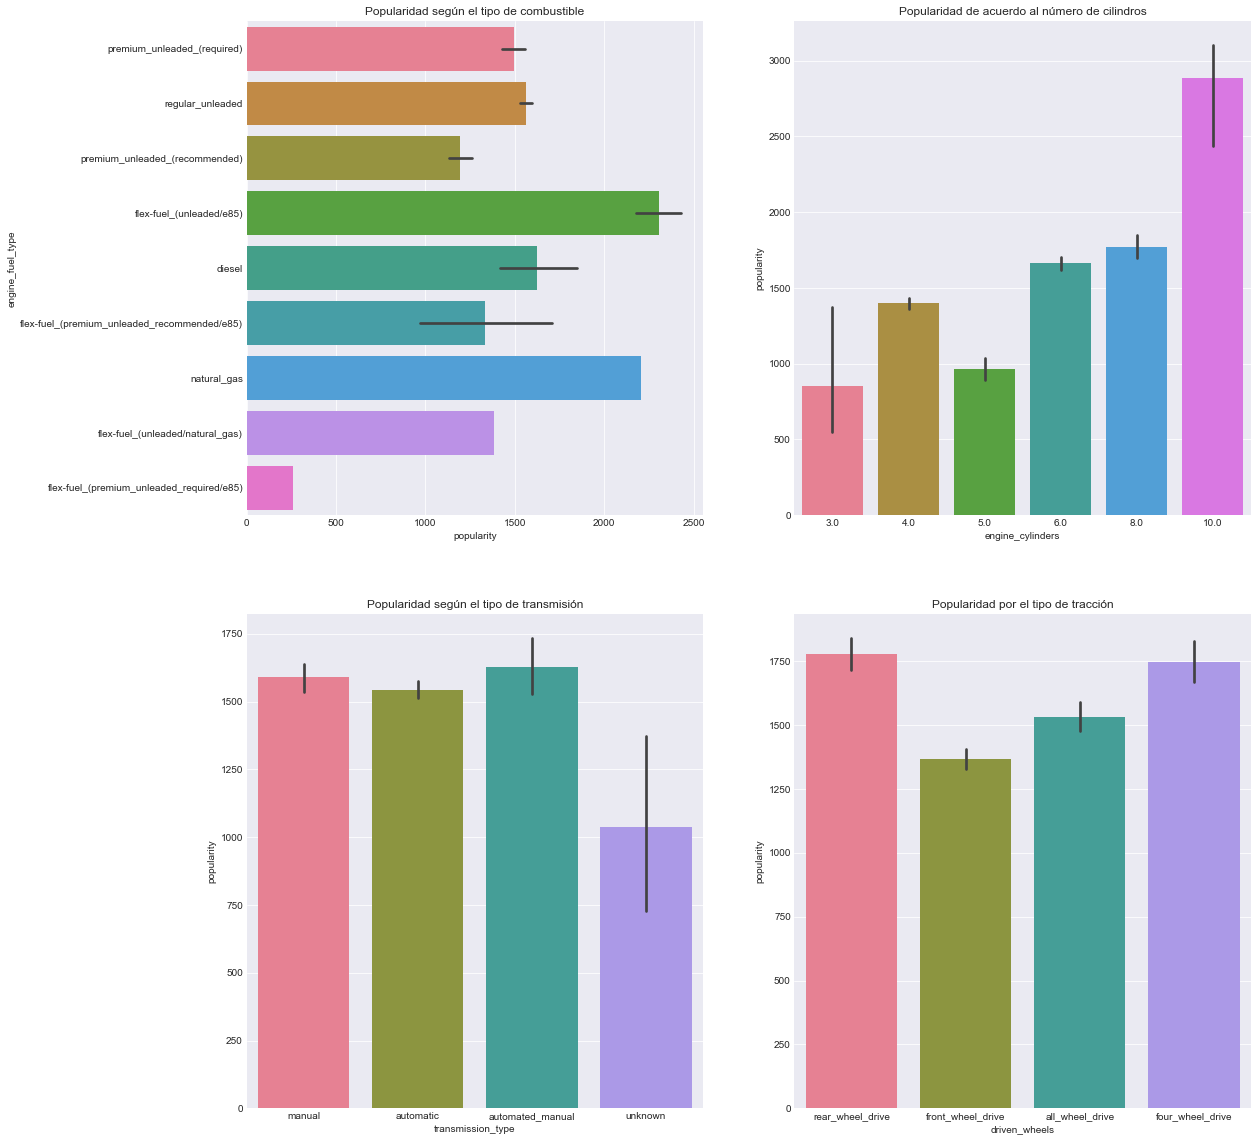

In [ ]:
fig6, ax = plt.subplots(2, 2, figsize=(18,20))
sns.barplot(ax = ax[0][0], y = 'engine_fuel_type', x = 'popularity', data = new_df, palette = 'husl');
sns.barplot(ax = ax[0][1], x = 'engine_cylinders', y = 'popularity', data = new_df, palette = 'husl');
sns.barplot(ax = ax[1][0], x = 'transmission_type', y = 'popularity', data = new_df, palette = 'husl');
sns.barplot(ax = ax[1][1], x = 'driven_wheels', y = 'popularity', data = new_df, palette = 'husl');
ax[0][0].set_title('Popularidad según el tipo de combustible');
ax[0][1].set_title('Popularidad de acuerdo al número de cilindros');
ax[1][0].set_title('Popularidad según el tipo de transmisión');
ax[1][1].set_title('Popularidad por el tipo de tracción');

Gráficas de las cuales es posible obtener variadas conclusiones, como lo es afirmar que la popularidad de los vehículos no está determinada por el tipo de transmisión, mientras que sí lo está por el número de cilindros dado que los de 10 cilindros tienen clara predominancia.

Por otro lado, resulta útil hacer diagramas de caja para las variables relacionadas con el número de puertas y el estilo del vehículo:

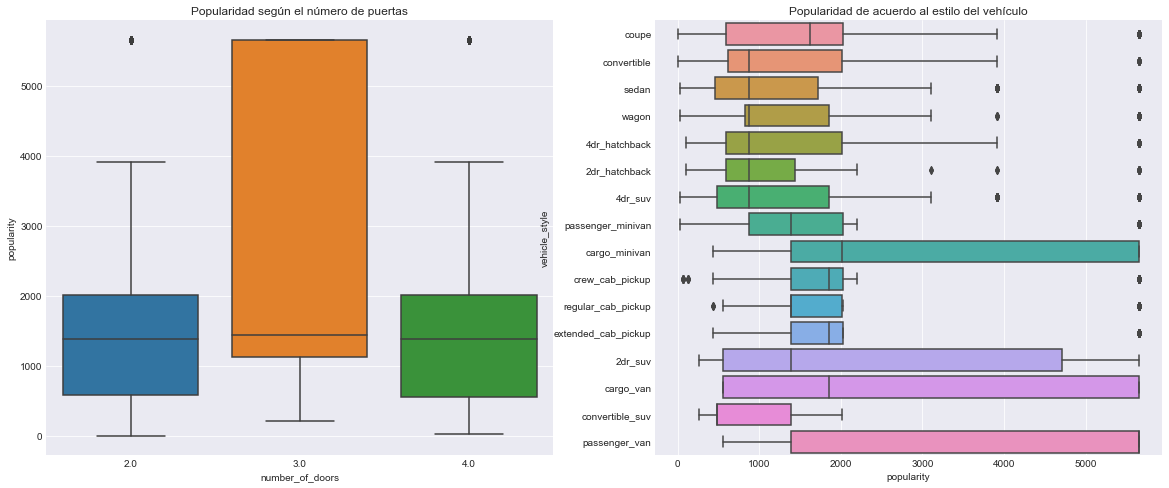

In [ ]:
fig7, ax = plt.subplots(1, 2, figsize=(20,8))
sns.boxplot(ax = ax[0], x = 'number_of_doors', y = 'popularity', data = new_df);
sns.boxplot(ax = ax[1], y = 'vehicle_style', x = 'popularity', data = new_df);
ax[0].set_title('Popularidad según el número de puertas');
ax[1].set_title('Popularidad de acuerdo al estilo del vehículo');

Entre las particularidades de las gráficas anteriores resaltan la preferencia de los usuarios por los vehículos de 3 puertas, así como la variada popularidad de las furgonetas de carga (cargo_van).

Por otro lado, es posible relacionar las variables que indican el consumo de combustible en la ciudad y en carretera con variables como el número de puertas, el tipo de tracción o de transmisión, y a su vez con el precio como se ve a continuación:

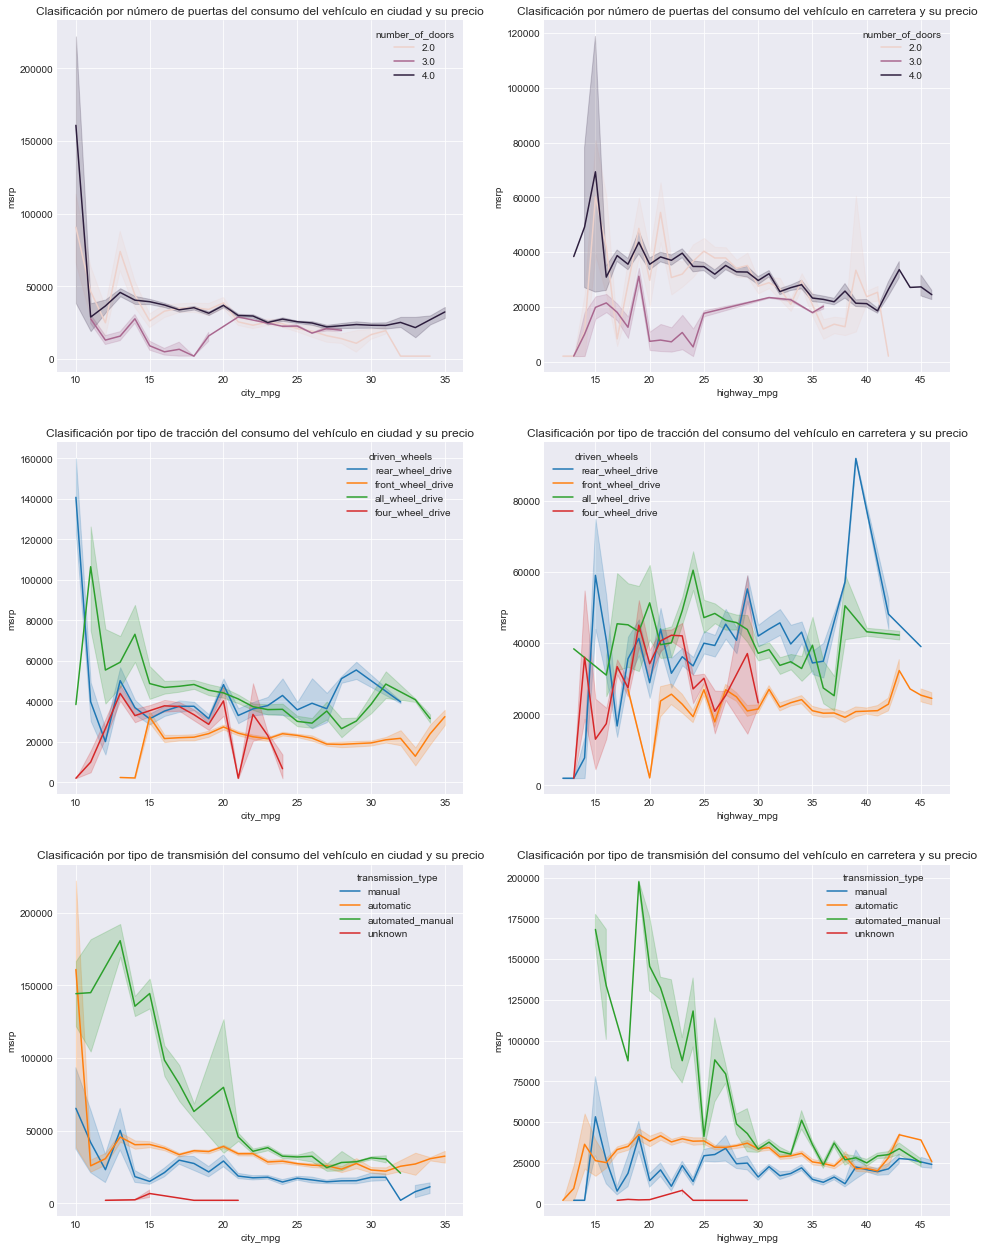

In [ ]:
fig8, ax = plt.subplots(3, 2, figsize=(16,22))
sns.lineplot(ax = ax[0][0], x = 'city_mpg', y = 'msrp', hue = "number_of_doors", data = new_df);
sns.lineplot(ax = ax[0][1], x = 'highway_mpg', y = 'msrp', hue = "number_of_doors", data = new_df);
sns.lineplot(ax = ax[1][0], x = 'city_mpg', y = 'msrp', hue = "driven_wheels", data = new_df);
sns.lineplot(ax = ax[1][1], x = 'highway_mpg', y = 'msrp', hue = "driven_wheels", data = new_df);
sns.lineplot(ax = ax[2][0], x = 'city_mpg', y = 'msrp', hue = "transmission_type", data = new_df);
sns.lineplot(ax = ax[2][1], x = 'highway_mpg', y = 'msrp', hue = "transmission_type", data = new_df);
ax[0][0].set_title('Clasificación por número de puertas del consumo del vehículo en ciudad y su precio');
ax[0][1].set_title('Clasificación por número de puertas del consumo del vehículo en carretera y su precio');
ax[1][0].set_title('Clasificación por tipo de tracción del consumo del vehículo en ciudad y su precio');
ax[1][1].set_title('Clasificación por tipo de tracción del consumo del vehículo en carretera y su precio');
ax[2][0].set_title('Clasificación por tipo de transmisión del consumo del vehículo en ciudad y su precio');
ax[2][1].set_title('Clasificación por tipo de transmisión del consumo del vehículo en carretera y su precio');

Los resultados obtenidos de las figuras anteriores aportan una gran cantidad de información para ser aprovechada en la industria automotriz, a pesar de que estas no muestran su relación con la popularidad sí incluye la relación con los precios, por ejemplo de las gráficas del tipo de transmisión es notorio que los vehículos con transmisión automática y manual son los más costosos, pero los hay de bajo, medio y alto consumo de combustible en la ciudad y en carretera.